In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1.03,'Figure Title')

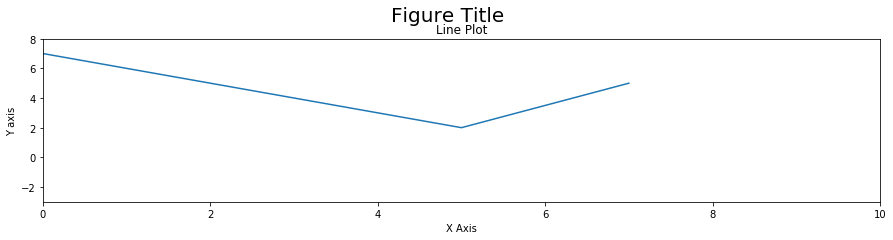

In [2]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

Text(0.5,1.03,'Figure Title')

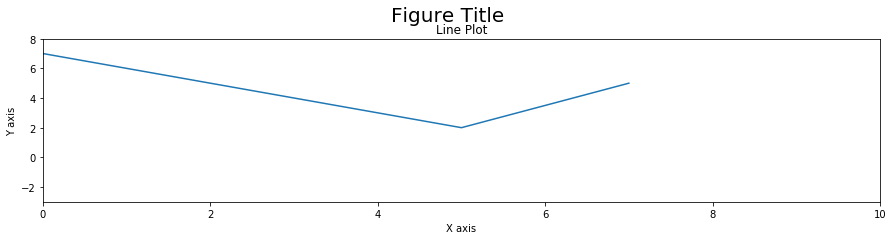

In [3]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

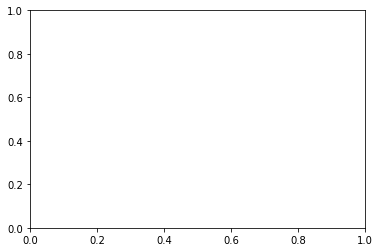

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)

In [5]:
type(fig)

matplotlib.figure.Figure

In [6]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [7]:
fig.get_size_inches()

array([6., 4.])

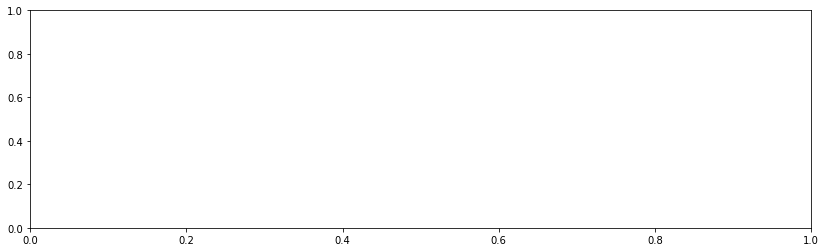

In [8]:
fig.set_size_inches(14, 4)
fig

In [9]:
fig.axes

In [10]:
fig.axes[0] is ax

True

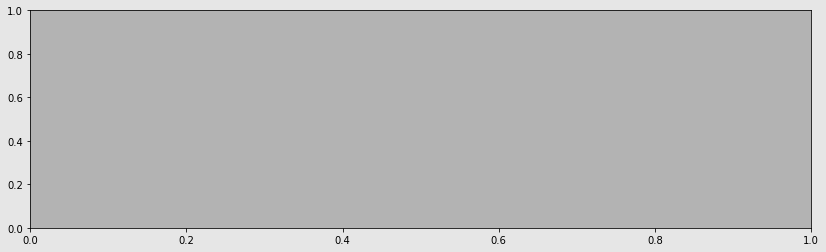

In [11]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [12]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x7bf34b0>),
             ('right', <matplotlib.spines.Spine at 0x7bf3590>),
             ('bottom', <matplotlib.spines.Spine at 0x7bf3170>),
             ('top', <matplotlib.spines.Spine at 0x7bf3310>)])

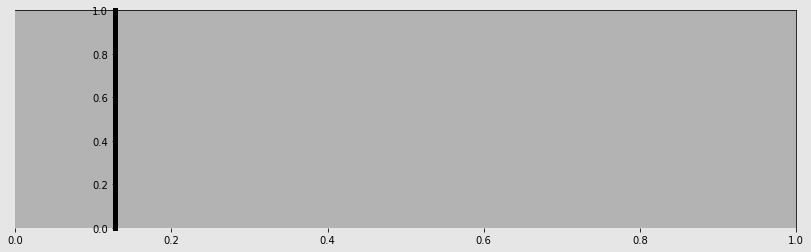

In [13]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

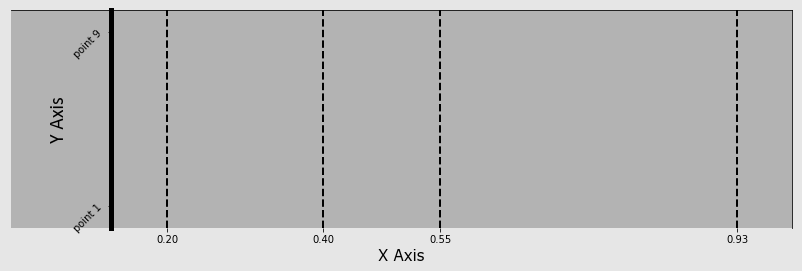

In [14]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

In [15]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5,22.2,'X Axis'),
  Text(1,23.2,''),
 'clip_box': TransformedBbox(
     Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
     CompositeGenericTransform(
         CompositeGenericTransform(
             BboxTransformTo(
                 Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)),
             Affine2D(
                 [[1. 0. 0.]
                  [0. 1. 0.]
                  [0. 0. 1.]])),
         BboxTransformTo(
             TransformedBbox(
                 Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                 BboxTransformTo(
                     TransformedBbox(
                         Bbox(x0=0.0, y0=0.0, x1=14.0, y1=4.0),
                         Affine2D(
                             [[72.  0.  0.]
                              [ 0. 72.  0.]
                              [ 0.  0.  1.]]))))))),
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure s

In [16]:
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [17]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [18]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0,0.5,'Millions of Dollars')

C:\Users\lenovo\Miniconda3\envs\name_of_my_env\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


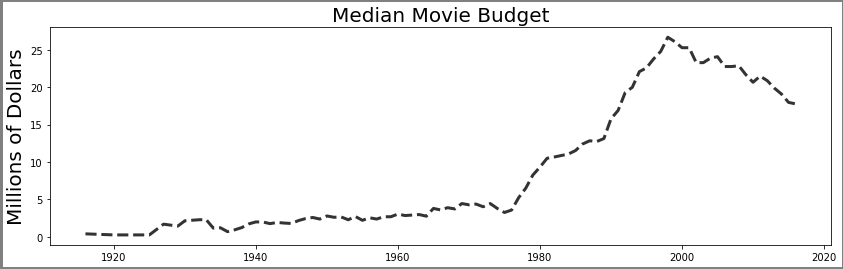

In [19]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [20]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

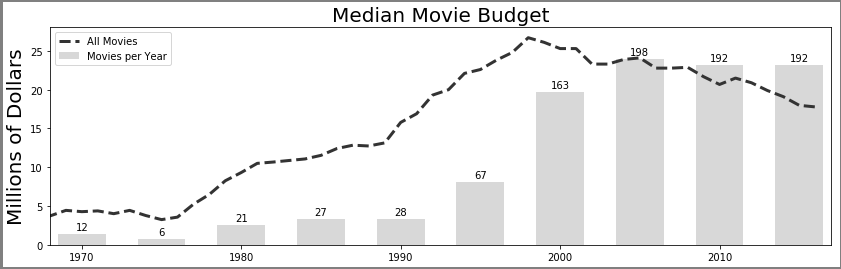

In [21]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

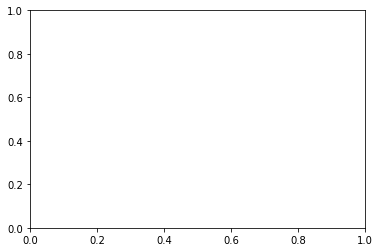

In [22]:
plot_objects = plt.subplots()

In [23]:
type(plot_objects)

tuple

In [24]:
fig = plot_objects[0]
ax = plot_objects[1]

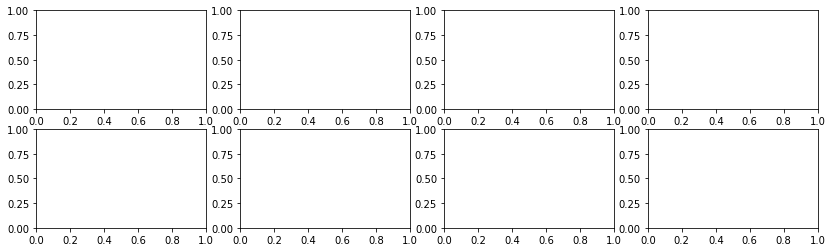

In [25]:
plot_objects = plt.subplots(2, 4, figsize=(14, 4))

In [26]:
plot_objects[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04725850>,
      dtype=object)

In [27]:
fig.get_axes() == fig.axes

True

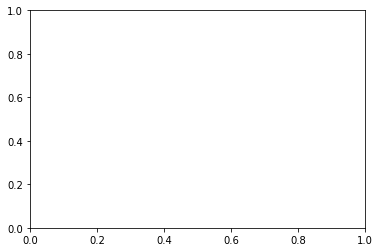

In [28]:
fig, ax = plt.subplots()

In [29]:
fig.axes == fig.get_axes()

True

In [ ]:
ax.xaxis == ax.get_xaxis()